In [15]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from scipy import cluster
from matplotlib import pyplot

In [11]:
df=pd.read_csv('/Users/sergey/Documents/TUM/IDP/Clustering/K-Means/data_1024.csv',delimiter='\t')
print(df.head(3))

    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24              28.0
1  3423313212             52.53              25.0
2  3423313724             64.54              27.0


In [44]:
df=pd.read_csv('/Users/sergey/Documents/TUM/IDP/Clustering/K-Means/TargetMatrix.csv',delimiter='\t')
print(df.head(3))

  InvetmentName  VaR_95(%)    StdDev  Risk_of_Loss (%)      Beta    Sharpe
0       TGTG.DE      -4.43  0.027967             31.84  0.000276  0.012383
1       UUUG.DE      -3.32  0.019529             35.29  0.000085  0.044891
2       VSCk.DE     -21.02  0.127806             49.41  0.001929  0.024607


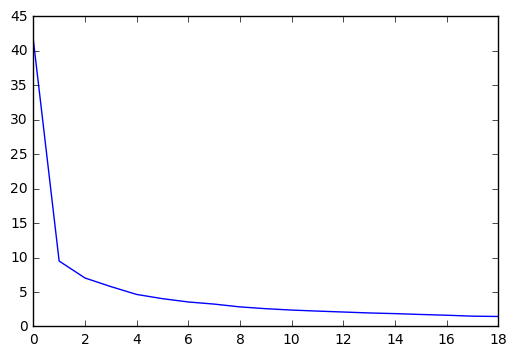

In [41]:
f1 = df['Distance_Feature'].values

#plot variance for each value for 'k' between 1,20
initial = [cluster.vq.kmeans(f1,i) for i in range(1,20)]
pyplot.plot([var for (cent,var) in initial])
pyplot.show()

In [40]:
print(f1.shape[0])

4000


In [35]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass




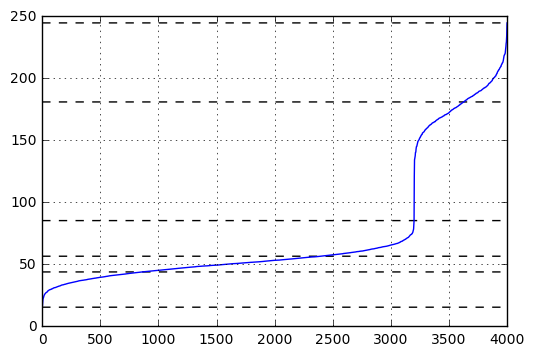

In [38]:
x = df['Distance_Feature'].values
breaks = get_jenks_breaks(x, 5)

for line in breaks:
    pyplot.plot([line for _ in range(len(x))], 'k--')

pyplot.plot(x)
pyplot.grid(True)
pyplot.show()